In [1]:
# Reward function shaping in this script without terminal rewards
# Using the scaled datasets, smaller rewards used to improve stabiltiy in continous models
# TODO extend for the discrete case also. Right now, discrete uses only sparse rewards

In [2]:
import pandas as pd
import numpy as np
try:
    import cPickle as pickle
except ImportError:
    import _pickle as pickle

In [3]:
below65 = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_below65_scaled.csv')
above65 =  pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_above65_scaled.csv')

In [4]:
below65.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,vaso_input,reward
0,38563000,0.0,1.0,0.425532,0.107514,1.0,1.0,0.043478,0.065682,NaN,...,0.105287,0.506438,0.563117,0.959184,0.000483,0.039987,0.057143,0,2.0,0
1,38563000,0.0,1.0,0.425532,0.107514,1.0,1.0,0.086957,0.065682,NaN,...,0.105287,0.506438,0.563117,0.959184,0.000483,0.039987,0.057143,0,2.0,0
2,38563000,0.0,1.0,0.425532,0.107514,1.0,1.0,0.173913,0.065682,NaN,...,0.105287,0.506438,0.563117,0.959184,0.000483,0.039987,0.057143,0,2.0,0
3,38563000,0.0,1.0,0.425532,0.107514,1.0,1.0,0.043478,0.065682,NaN,...,0.105287,0.506438,0.563117,0.959184,0.000483,0.039987,0.057143,0,2.0,0
4,38563000,0.0,1.0,0.425532,0.107514,1.0,1.0,0.086957,0.065682,NaN,...,0.105287,0.506438,0.563117,0.959184,0.000483,0.039987,0.057143,0,2.0,0


In [5]:
len(below65)

3039390

In [6]:
above65.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,vaso_input,reward
0,34712382,0.277778,0.75,1.553191,0.048170,0.0,0.916667,0.304348,0.065682,NaN,...,0.179487,0.218884,0.563117,0.959184,0.000983,0.123571,0.000000,0,2.0,0
1,34712382,0.277778,0.75,1.553191,0.048170,0.0,0.916667,0.304348,0.065682,NaN,...,0.179487,0.218884,0.563117,0.959184,0.000983,0.123571,0.000000,0,2.0,0
2,34712382,0.277778,0.75,1.553191,0.048170,0.0,0.916667,0.304348,0.065682,NaN,...,0.179487,0.218884,0.563117,0.959184,0.000983,0.123571,0.000000,1,2.0,0
3,34712382,0.277778,0.75,1.553191,0.048170,0.0,0.916667,0.304348,0.065682,NaN,...,0.179487,0.218884,0.563117,0.959184,0.000983,0.123571,0.000000,1,2.0,-100
4,30902754,0.000000,1.00,1.468085,0.104046,1.0,0.416667,0.043478,0.065682,NaN,...,0.017094,0.476395,0.563117,0.969388,0.000986,0.326336,0.042857,1,4.0,0


In [7]:
# Smaller rewards to improve stability in continuous models
below65.loc[below65['reward'] > 15,'reward'] = 15
below65.loc[below65['reward'] < -15,'reward'] = -15

above65.loc[above65['reward'] > 15,'reward'] = 15
above65.loc[above65['reward'] < -15,'reward'] = -15

In [8]:
orig_df = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\Final2.csv')

In [9]:
c0 = -0.1/4
c1 = -0.5/4
c2 = -2

In [10]:
# add rewards

# Store relevant columns in variables
sofa_cur = orig_df['sofa_score']
sofa_prev = orig_df['sofa_score'].shift(1)

# Calculate masks for conditions
is_same_sofa = sofa_cur == sofa_prev
is_non_zero_sofa = sofa_cur != 0

# Calculate the shaped reward using vectorized operations
reward = np.where((orig_df['stay_id'] == orig_df['stay_id'].shift(1)) & is_same_sofa & is_non_zero_sofa, c0, 0) + c1 * (sofa_cur - sofa_prev)

# Assign the calculated reward to the 'shaped_reward' column, shifted by one row
orig_df['shaped_reward'] = reward.shift(1).fillna(0)

# Print progress for every 10000 rows
for i in range(0, len(orig_df), 10000):
    print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [11]:
print(orig_df['shaped_reward'].value_counts())

-0.025    6035065
 0.000       2104
-0.125        188
 0.250        130
-0.250        126
 0.125        126
-0.375         91
 0.375         79
-0.500         72
 0.500         70
-0.625         55
 0.625         53
 0.875         35
 0.750         32
-0.875         31
-0.750         28
 1.000         17
-1.000         17
-1.125         11
 1.250          7
 1.375          5
-1.250          5
 1.125          4
 1.500          3
 1.625          3
-1.375          2
-1.500          2
-2.125          1
 2.125          1
-1.625          1
 1.875          1
Name: shaped_reward, dtype: int64


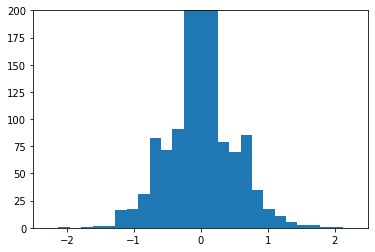

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(orig_df['shaped_reward'], bins=25)
plt.xlim([-2.5, 2.5])  # Set x-axis limits to -2.5 and 2.5
plt.ylim([0,200]) #Set y-axis limits till 200 to show other values distribution instead of just -0.25
plt.show()

In [13]:
#Split the dataset based on age
split_column = "age"

# Determine the range of values you want to split on
age_value = 65

# Filter the dataset to create the subsets based on the range of values in the column
df_below_65 = orig_df[orig_df[split_column] <= age_value]
df_above_65 = orig_df[orig_df[split_column] > age_value]

In [14]:
below65_rewards = df_below_65['shaped_reward']

In [15]:
len(below65_rewards)

3039390

In [16]:
below65_rewards.tail()

6038360   -0.025
6038361   -0.025
6038362   -0.025
6038363   -0.025
6038364   -0.025
Name: shaped_reward, dtype: float64

In [17]:
above65_rewards = df_above_65['shaped_reward']

In [18]:
len(above65_rewards)

2998975

In [19]:
above65_rewards.tail()

6037920   -0.025
6037921   -0.025
6037922   -0.025
6037923   -0.025
6037924   -0.025
Name: shaped_reward, dtype: float64

In [20]:
len(orig_df['shaped_reward'])

6038365

In [21]:
# check that this sums to the total number of data items -- needs to be re-run
len(below65_rewards) + len(above65_rewards)

6038365

In [22]:
below65['reward'] += np.array(below65_rewards)
above65['reward'] += np.array(above65_rewards)

In [23]:
below65.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_below65_final_cont.csv',index=False)
above65.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_above65_final_cont.csv', index=False)